### Law of Large Numbers 

The (weak) Law of Large Numbers states that for any probability measure $ P $ with mean $ \mu(P) < \infty $, the distribution $ \overline{P_n} $ of the *n*-sample mean assigns a probability mass $ \overline{P_n} \left(  [\mu(P) - \epsilon, \mu(P) + \epsilon] \right ) $ which converges to 1 as $ n \to \infty $ to any small interval around $ \mu(P) $. In this question, you will put this statement to the test.

 (a) 
We take $ P $ to be Poisson distribution $ \text{Poisson}(\lambda) $ with $ \lambda = 3 $. Look up what $ \mu(P) $ is in this case, and let's consider the interval $ [\mu(P) - \epsilon, \mu(P) + \epsilon] $ for $ \epsilon = 0.1 $.

(b)
We sample 1000 times from $ P_n $ with $ n = 100 $ and plot a histogram of your sample. On your histogram, display the interval $ [\mu(P) - \epsilon, \mu(P) + \epsilon] $ by plotting vertical lines at $ \mu(P) - \epsilon $ and $ \mu(P) + \epsilon $.


In [1]:
import numpy as np
from scipy.stats import poisson, cauchy  
from matplotlib import pyplot as plt

(1000,)


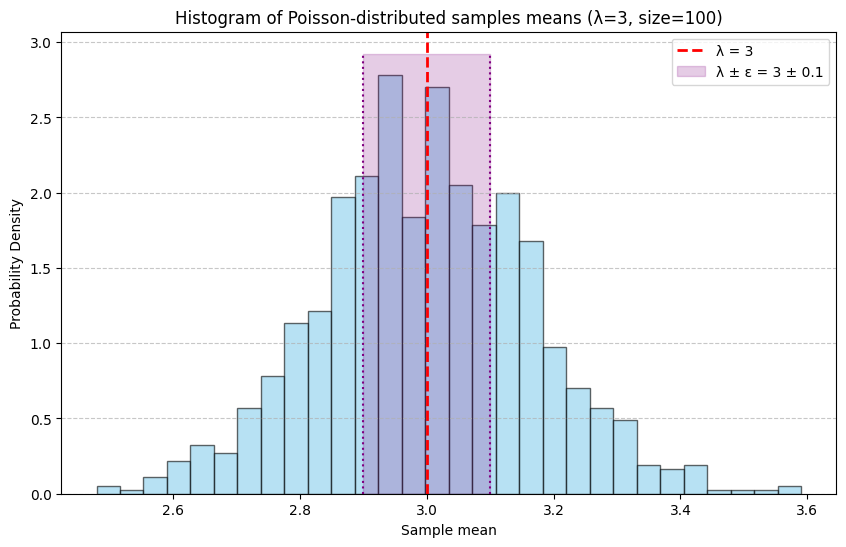

In [2]:
lambda_val = 3
epsilon = 0.1
n = 100
n_trials = 1000

samples = poisson.rvs(mu = lambda_val, size = (n_trials, n))
samples_mean = samples.mean(axis =1)
print(samples_mean.shape)

plt.figure(figsize=(10, 6))
plt.hist(samples_mean, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

#vertical line at x = λ as this is the Poissons distributions mean value
plt.axvline(x=lambda_val, color='red', linestyle='--', linewidth=2, label=f'λ = {lambda_val}')
#shaded region is between λ - ε and λ + ε
y_limits = plt.gca().get_ylim()

plt.vlines([lambda_val - epsilon, lambda_val + epsilon], ymin=y_limits[0], ymax=y_limits[1], colors='purple', linestyles='dotted', linewidth=1.5)
plt.fill_betweenx(y_limits, lambda_val - epsilon, lambda_val + epsilon, color='purple', alpha=0.2, label=f'λ ± ε = {lambda_val} ± {epsilon}')


plt.title(f'Histogram of Poisson-distributed samples means (λ={lambda_val}, size={n})')
plt.xlabel('Sample mean')
plt.ylabel('Probability Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [3]:
p_eps = len(samples_mean[(samples_mean < lambda_val + epsilon) & (samples_mean > lambda_val - epsilon)])
print(f'The proportion of samples mean to fall within the interval [mu(P)-epsilon , mu(P)+epsilon] is equal to {p_eps/len(samples_mean)}')


The proportion of samples mean to fall within the interval [mu(P)-epsilon , mu(P)+epsilon] is equal to 0.422



(c)
We repeat the steps above for a value of $ n $ that is sufficiently big for **all** the samples to lie in $ [\mu(P) - \epsilon, \mu(P) + \epsilon] $. 

In [4]:
def calculate_p_eps(n, lambda_val= 3, epsilon= 0.1, n_trials= 1000):
    samples = poisson.rvs(mu=lambda_val, size=(n_trials, n))
    samples_mean = samples.mean(axis=1) 
    p_eps = len(samples_mean[(samples_mean < lambda_val + epsilon) & (samples_mean > lambda_val - epsilon)]) / len(samples_mean)
    return p_eps

def calc_min_n(n_trials, lambda_val= 3, epsilon= 0.1, step=500):
    # Iterate to find the minimum n
    n = 500
    while True:
        p_eps = calculate_p_eps(n, lambda_val, epsilon, n_trials) 
        if p_eps == 1:
            print(f"Minimum n such that p_eps = 1 in every iteration: {n}")
            break
        else: 
            n += step
    return n


'''
A mini iterative algorithm to calculate the minimum n which will be a multiple of 500. 

Then running this algorithm 30 times (using Central Limit Theorem ideology) 
to get the mean and standard deviation value which occured.

Finally we add 3 standard deviations to the mean in order to be sure 
that our entire sample means will lie within [lambda - epsilon, lambda + epsilon].
We are using a rounded output just for simplicity reasons


Disclaimer: If the notebook is run again the value of n will vary slightly due to the nature of the experiment
'''

alg_res = [calc_min_n( n_trials= 1000, lambda_val= 3, epsilon= 0.1, step=500) for _ in range(30)]

print(f"Maximum n over 10 iterations: {max(alg_res)}")
print(f'We take n= { round(np.mean(alg_res) + 3 * np.std(alg_res) , -2 )} ')

Minimum n such that p_eps = 1 in every iteration: 3500
Minimum n such that p_eps = 1 in every iteration: 4500
Minimum n such that p_eps = 1 in every iteration: 4000
Minimum n such that p_eps = 1 in every iteration: 3000
Minimum n such that p_eps = 1 in every iteration: 3500
Minimum n such that p_eps = 1 in every iteration: 3000
Minimum n such that p_eps = 1 in every iteration: 4500
Minimum n such that p_eps = 1 in every iteration: 3500
Minimum n such that p_eps = 1 in every iteration: 4000
Minimum n such that p_eps = 1 in every iteration: 3000
Minimum n such that p_eps = 1 in every iteration: 3500
Minimum n such that p_eps = 1 in every iteration: 3000
Minimum n such that p_eps = 1 in every iteration: 3500
Minimum n such that p_eps = 1 in every iteration: 4000
Minimum n such that p_eps = 1 in every iteration: 3000
Minimum n such that p_eps = 1 in every iteration: 4500
Minimum n such that p_eps = 1 in every iteration: 3000
Minimum n such that p_eps = 1 in every iteration: 3500
Minimum n 

(1000,)


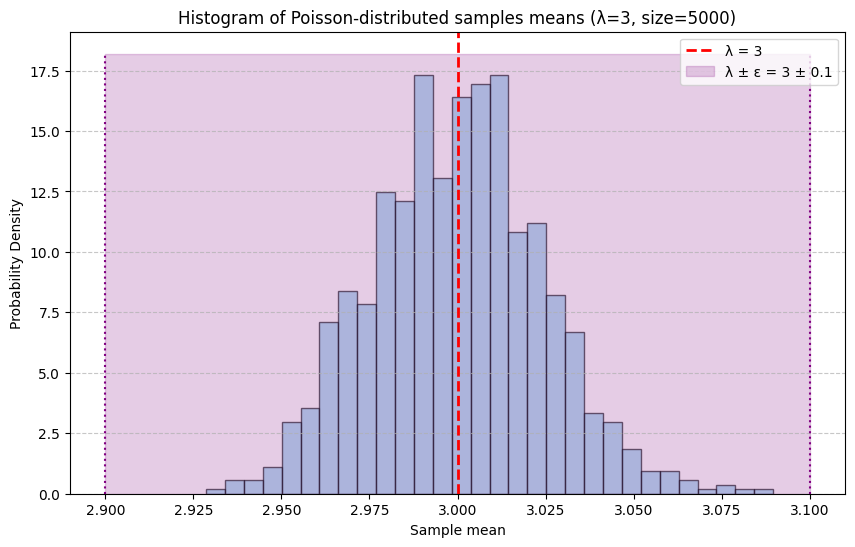

In [5]:
lambda_val = 3
epsilon = 0.1
n = 5000
n_trials = 1000

samples = poisson.rvs(mu = lambda_val, size = (n_trials, n))
samples_mean = samples.mean(axis =1)
print(samples_mean.shape)

plt.figure(figsize=(10, 6))
plt.hist(samples_mean, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
#Vertical line at x = λ as this is the Poissons distributions mean value
plt.axvline(x=lambda_val, color='red', linestyle='--', linewidth=2, label=f'λ = {lambda_val}')

#Shaded region is between λ - ε and λ + ε
y_limits = plt.gca().get_ylim()
plt.vlines([lambda_val - epsilon, lambda_val + epsilon], ymin=y_limits[0], ymax=y_limits[1], colors='purple', linestyles='dotted', linewidth=1.5)
plt.fill_betweenx(y_limits, lambda_val - epsilon, lambda_val + epsilon, color='purple', alpha=0.2, label=f'λ ± ε = {lambda_val} ± {epsilon}')

plt.title(f'Histogram of Poisson-distributed samples means (λ={lambda_val}, size={n})')
plt.xlabel('Sample mean')
plt.ylabel('Probability Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [6]:
p_eps = len(samples_mean[(samples_mean < lambda_val + epsilon) & (samples_mean > lambda_val - epsilon)])
print(f'The proportion of samples mean to fall within the interval [mu(P)-epsilon , mu(P)+epsilon] is equal to {p_eps/len(samples_mean)}')


The proportion of samples mean to fall within the interval [mu(P)-epsilon , mu(P)+epsilon] is equal to 1.0



(d)
For the value of $ n $ obtained we re-run the same experiment but this time for $ P $ given by the standard Cauchy distribution and the interval $ [-0.1, 0.1] $.  

The percentage of sample means that lie in the interval [-0.1, 0.1] is 7.000000000000001%


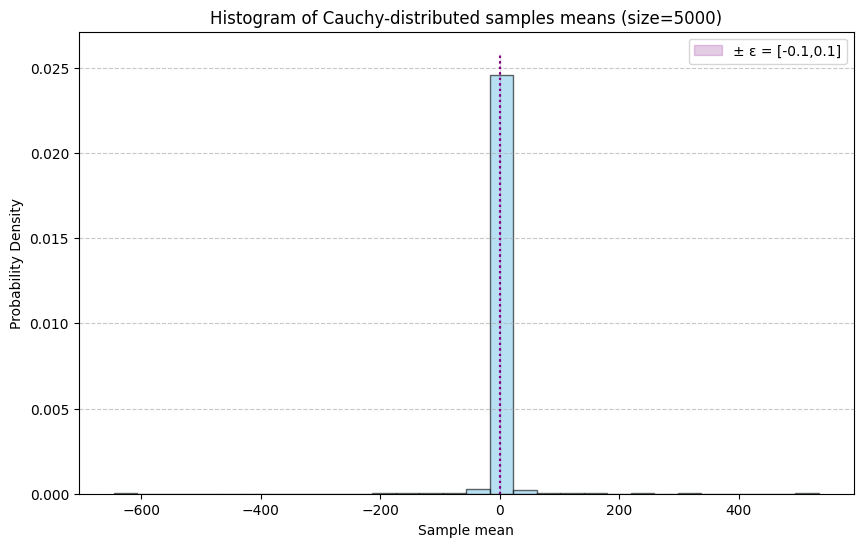

In [7]:
epsilon = 0.1
n = 5000
size = 1000

samples = cauchy.rvs(size= ((size, n)))
samples_mean = samples.mean(axis =1)

p_eps = len(samples_mean[(samples_mean < epsilon) & (samples_mean > -epsilon)]) / len(samples_mean)
if p_eps!= 1:
    print(f'The percentage of sample means that lie in the interval [-0.1, 0.1] is {100*p_eps}%')


plt.figure(figsize=(10, 6))
plt.hist(samples_mean, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

y_limits = plt.gca().get_ylim()
plt.vlines([- epsilon, epsilon], ymin=y_limits[0], ymax=y_limits[1], colors='purple', linestyles='dotted', linewidth=1.5)
plt.fill_betweenx(y_limits, - epsilon, epsilon, color='purple', alpha=0.2, label=f'± ε = [{-epsilon},{epsilon}]')

plt.title(f'Histogram of Cauchy-distributed samples means (size={n})')
plt.xlabel('Sample mean') 
plt.ylabel('Probability Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

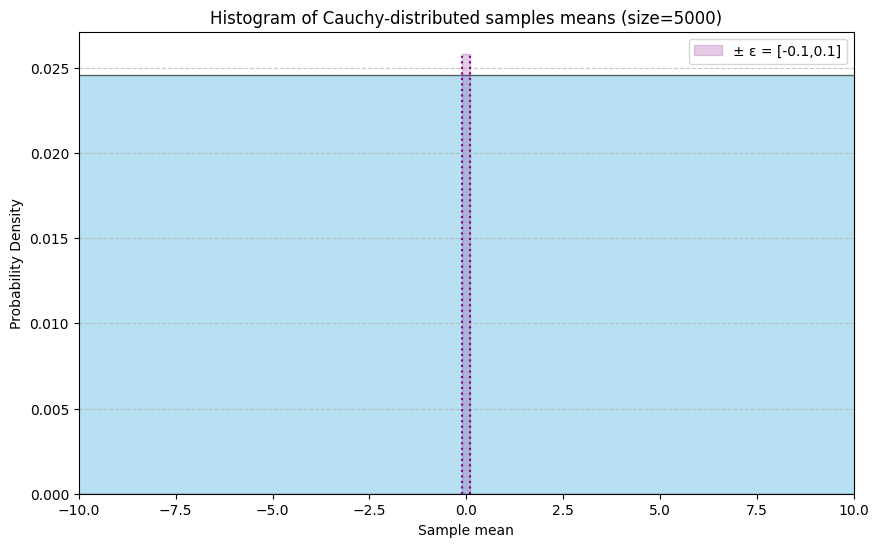

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(samples_mean, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

#Shaded region is between λ - ε and λ + ε
y_limits = plt.gca().get_ylim()
plt.vlines([- epsilon, epsilon], ymin=y_limits[0], ymax=y_limits[1], colors='purple', linestyles='dotted', linewidth=1.5)
plt.fill_betweenx(y_limits, - epsilon, epsilon, color='purple', alpha=0.2, label=f'± ε = [{-epsilon},{epsilon}]')

plt.title(f'Histogram of Cauchy-distributed samples means (size={n})')
plt.xlabel('Sample mean')
plt.xlim(-10,10)
plt.ylabel('Probability Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [9]:
mean, var, skew, kurt = cauchy.stats(moments = 'mvsk')
mean, var, skew, kurt 

(nan, nan, nan, nan)

The reason why not only p_eps is not 1 but most sample means do not lie in the interval $[-0.1,0.1]$(and why the 4 main estimator values above, returned by scipy, are undefined) is that:

If $ X_1, X_2, \ldots, X_n $ are an **IID** sample from the standard Cauchy distribution, then their **sample mean**  $[
\bar{X} = \frac{1}{n} \sum_i X_i
]$ is also standard Cauchy distributed. 

In particular, the average does not converge to the mean, and so the standard Cauchy distribution does not follow the law of large numbers.

This can be proved by repeated integration with the PDF, or more conveniently, by using the **characteristic function** of the standard Cauchy distribution:

$[
\varphi_X(t) = \mathbb{E} \left[ e^{i X t} \right] = e^{-|t|}.
]$

With this, we have $( \varphi_{\sum_i X_i}(t) = e^{-n |t|} )$, and so $( \bar{X}) $ has a standard Cauchy distribution.
